<a href="https://colab.research.google.com/github/Shreyas3108/Upgrad_DS/blob/master/Linear_Regression_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm

In [0]:
df = pd.read_csv('https://github.com/Shreyas3108/Upgrad_DS/raw/master/College.csv')

In [0]:
df.shape

(777, 19)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [0]:
y = df['Grad.Rate']

In [0]:
x = df.drop(['Unnamed: 0' , 'Grad.Rate'],axis = 1)

In [0]:
x.shape

(777, 17)

In [0]:
import seaborn as sns

In [0]:
x['Private'] = x['Private'].apply(lambda x:1 if x == 'Yes' else 0)

In [0]:
x.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
dtype: object

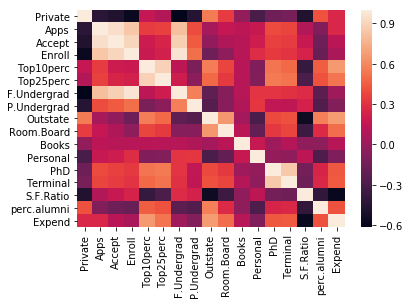

In [0]:
sns.heatmap(x.corr())

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [0]:
X = add_constant(x)
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
variance_inflation_factor(X.values , 3)

21.362550778368597

In [0]:
vif

const          112.423767
Private          2.731336
Apps            13.963107
Accept          21.362551
Enroll          21.971430
Top10perc        7.654596
Top25perc        5.661066
F.Undergrad     18.058175
P.Undergrad      1.685637
Outstate         4.212636
Room.Board       2.005442
Books            1.107910
Personal         1.297605
PhD              4.110407
Terminal         4.020950
S.F.Ratio        1.899649
perc.alumni      1.773848
Expend           3.095630
dtype: float64

In [0]:
sel1 = ['Private', 'Top10perc',
       'Top25perc', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend']

In [0]:
X1 = add_constant(x[sel1])

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
lreg = sm.OLS(y , X1).fit()

In [0]:
lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     46.03
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           7.55e-87
Time:                        17:27:01   Log-Likelihood:                -3086.6
No. Observations:                 777   AIC:                             6201.
Df Residuals:                     763   BIC:                             6266.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          31.3676      4.881      6.426      0.000      21.785      40.950
Private         0.6342      1.585      0.400      0.689      -2.477       3.745
Top10perc       0.1121      0.068      1.637      0.102      -0.022       0.247
Top25perc       0.1449      0.055      2.634      0.009       0.037       0.253
P.Undergrad    -0.0012      0.000     -3.195      0.001      -0.002      -0.000
Outstate        0.0011      0.000      4.632      0.000       0.001       0.002
Room.Board      0.0024      0.001      4.008      0.000       0.001       0.004
Books          -0.0018      0.003     -0.598      0.550      -0.008       0.004
Personal       -0.0016      0.001     -2.041      0.042      -0.003   -6.04e-05
PhD             0.0888      0.058      1.540      0.124      -0.024       0.202
Terminal       -0.0815      0.063     -1.288      0.198      -0.206       0.043
S.F.Ratio       0.1664      0.161      1.036      0.301      -0.149       0.482
perc.alumni     0.2563      0.049      5.192      0.000       0.159       0.353
Expend         -0.0003      0.000     -2.056      0.040      -0.001   -1.41e-05
==============================================================================
Omnibus:                       31.988   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.944
Skew:                           0.202   Prob(JB):                     2.39e-16
Kurtosis:                       4.435   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
sel2 = ['const','Top25perc', 'P.Undergrad', 'Outstate',
       'Room.Board', 'Personal', 
       'perc.alumni', 'Expend']

In [0]:
lreg1 = sm.OLS(y , X1[sel2]).fit()

In [0]:
lreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     84.17
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.14e-90
Time:                        17:32:00   Log-Likelihood:                -3090.5
No. Observations:                 777   AIC:                             6197.
Df Residuals:                     769   BIC:                             6234.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          31.7079      2.556     12.408      0.000      26.691      36.725
Top25perc       0.2258      0.029      7.785      0.000       0.169       0.283
P.Undergrad    -0.0012      0.000     -3.474      0.001      -0.002      -0.001
Outstate        0.0011      0.000      5.218      0.000       0.001       0.001
Room.Board      0.0022      0.001      3.891      0.000       0.001       0.003
Personal       -0.0017      0.001     -2.176      0.030      -0.003      -0.000
perc.alumni     0.2572      0.048      5.317      0.000       0.162       0.352
Expend         -0.0003      0.000     -2.120      0.034      -0.001   -2.03e-05
==============================================================================
Omnibus:                       30.228   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.029
Skew:                           0.173   Prob(JB):                     1.02e-15
Kurtosis:                       4.419   Cond. No.                     8.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(y,lreg1.predict(X1[sel2]))

0.4338136220515475

In [0]:
len(sel2)

8

In [0]:
x.shape

(777, 17)